In [33]:
!pip install scikit-learn

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [36]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
x=df.drop(columns=['math score'],axis=1)

In [39]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [40]:
y=df['math score']

In [41]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [42]:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
[
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",numeric_transformer,num_features),
]
)

In [43]:
x=preprocessor.fit_transform(x)

In [51]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape


((700, 19), (300, 19))

In [46]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_squared=r2_score(true,predicted)
    return mae,rmse,r2_squared
    

In [47]:
y_train.values.reshape(-1,1)

array([[ 79],
       [ 67],
       [ 68],
       [ 47],
       [ 72],
       [ 57],
       [ 83],
       [ 61],
       [ 98],
       [ 61],
       [ 92],
       [ 68],
       [ 77],
       [ 66],
       [ 47],
       [ 65],
       [ 68],
       [ 63],
       [ 73],
       [ 42],
       [ 62],
       [ 68],
       [ 67],
       [ 49],
       [ 35],
       [ 68],
       [ 69],
       [ 70],
       [ 80],
       [ 75],
       [ 63],
       [ 66],
       [ 74],
       [ 44],
       [ 72],
       [ 77],
       [ 46],
       [ 72],
       [ 82],
       [ 62],
       [ 80],
       [ 54],
       [ 79],
       [ 87],
       [ 65],
       [ 82],
       [ 40],
       [ 93],
       [ 65],
       [ 77],
       [ 46],
       [ 88],
       [ 32],
       [ 39],
       [ 86],
       [ 53],
       [ 81],
       [ 41],
       [ 61],
       [ 88],
       [ 59],
       [ 81],
       [ 58],
       [ 64],
       [ 81],
       [ 70],
       [ 62],
       [ 77],
       [ 62],
       [ 87],
       [ 67],
      

In [48]:
y_train

541    79
440    67
482    68
422    47
778    72
       ..
106    87
270    69
860    53
435    50
102    85
Name: math score, Length: 700, dtype: int64

In [53]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "k-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Xgboost Regressor":XGBRegressor(),
    "Catboosr Regressor":CatBoostRegressor(),
    "Adaboost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
   #y_train=y_train.values.reshape(-1,1)
   #y_test=y_test.values.reshape(-1,1)
    model.fit(x_train,y_train)
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("model performance for training set")
    print("Root Mean Squared Error:{:.4f}".format(model_train_rmse))
    print("Mean Absolute Error:{:.4f}".format(model_train_mae))
    print(" R2 Score:{:.4f}".format(model_train_r2))
                                 
                                 
    print("--"*30)
    print("model performance for test set")
    print("Root Mean Squared Error:{:.4f}".format(model_test_rmse))
    print("Mean Absolute Error:{:.4f}".format(model_test_mae))
    print(" R2 Score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
                                

Linear Regression
model performance for training set
Root Mean Squared Error:5.2675
Mean Absolute Error:4.2077
 R2 Score:0.8742
------------------------------------------------------------
model performance for test set
Root Mean Squared Error:5.6330
Mean Absolute Error:4.4779
 R2 Score:0.8725
Lasso
model performance for training set
Root Mean Squared Error:6.5106
Mean Absolute Error:5.1582
 R2 Score:0.8078
------------------------------------------------------------
model performance for test set
Root Mean Squared Error:6.8705
Mean Absolute Error:5.3929
 R2 Score:0.8103
Ridge
model performance for training set
Root Mean Squared Error:5.2487
Mean Absolute Error:4.1977
 R2 Score:0.8751
------------------------------------------------------------
model performance for test set
Root Mean Squared Error:5.5566
Mean Absolute Error:4.4155
 R2 Score:0.8759
k-Neighbors Regressor
model performance for training set
Root Mean Squared Error:5.6784
Mean Absolute Error:4.5037
 R2 Score:0.8538
-------

C:\Users\shambhuraj patil\AppData\Local\Temp\ipykernel_16300\15336235.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


Random Forest Regressor
model performance for training set
Root Mean Squared Error:2.2804
Mean Absolute Error:1.8022
 R2 Score:0.9764
------------------------------------------------------------
model performance for test set
Root Mean Squared Error:6.1725
Mean Absolute Error:4.8587
 R2 Score:0.8469
Xgboost Regressor
model performance for training set
Root Mean Squared Error:0.8436
Mean Absolute Error:0.5412
 R2 Score:0.9968
------------------------------------------------------------
model performance for test set
Root Mean Squared Error:6.2621
Mean Absolute Error:4.9241
 R2 Score:0.8424
Learning rate set to 0.038699
0:	learn: 14.4808454	total: 1.05ms	remaining: 1.05s
1:	learn: 14.1310727	total: 2.01ms	remaining: 1s
2:	learn: 13.7965835	total: 2.85ms	remaining: 947ms
3:	learn: 13.4565295	total: 3.86ms	remaining: 962ms
4:	learn: 13.1359703	total: 4.74ms	remaining: 944ms
5:	learn: 12.8658898	total: 5.57ms	remaining: 923ms
6:	learn: 12.5677905	total: 6.45ms	remaining: 916ms
7:	learn: 12.

313:	learn: 4.3517221	total: 260ms	remaining: 567ms
314:	learn: 4.3508004	total: 261ms	remaining: 567ms
315:	learn: 4.3448572	total: 262ms	remaining: 566ms
316:	learn: 4.3404922	total: 262ms	remaining: 566ms
317:	learn: 4.3379760	total: 263ms	remaining: 565ms
318:	learn: 4.3361588	total: 264ms	remaining: 564ms
319:	learn: 4.3300125	total: 265ms	remaining: 563ms
320:	learn: 4.3298109	total: 266ms	remaining: 563ms
321:	learn: 4.3296372	total: 267ms	remaining: 562ms
322:	learn: 4.3261788	total: 268ms	remaining: 561ms
323:	learn: 4.3216337	total: 268ms	remaining: 560ms
324:	learn: 4.3208211	total: 269ms	remaining: 559ms
325:	learn: 4.3167401	total: 270ms	remaining: 559ms
326:	learn: 4.3165810	total: 271ms	remaining: 558ms
327:	learn: 4.3123332	total: 272ms	remaining: 557ms
328:	learn: 4.3100039	total: 273ms	remaining: 556ms
329:	learn: 4.3050834	total: 274ms	remaining: 555ms
330:	learn: 4.3017596	total: 274ms	remaining: 555ms
331:	learn: 4.2995270	total: 275ms	remaining: 554ms
332:	learn: 

546:	learn: 3.7124260	total: 445ms	remaining: 368ms
547:	learn: 3.7096432	total: 446ms	remaining: 368ms
548:	learn: 3.7050535	total: 447ms	remaining: 367ms
549:	learn: 3.7019538	total: 447ms	remaining: 366ms
550:	learn: 3.7009909	total: 448ms	remaining: 365ms
551:	learn: 3.6975870	total: 449ms	remaining: 365ms
552:	learn: 3.6967973	total: 450ms	remaining: 364ms
553:	learn: 3.6945136	total: 451ms	remaining: 363ms
554:	learn: 3.6930516	total: 452ms	remaining: 362ms
555:	learn: 3.6922330	total: 453ms	remaining: 361ms
556:	learn: 3.6894397	total: 453ms	remaining: 361ms
557:	learn: 3.6871791	total: 454ms	remaining: 360ms
558:	learn: 3.6841676	total: 455ms	remaining: 359ms
559:	learn: 3.6828847	total: 456ms	remaining: 358ms
560:	learn: 3.6818658	total: 457ms	remaining: 358ms
561:	learn: 3.6801930	total: 458ms	remaining: 357ms
562:	learn: 3.6762711	total: 459ms	remaining: 356ms
563:	learn: 3.6733656	total: 460ms	remaining: 355ms
564:	learn: 3.6707537	total: 460ms	remaining: 355ms
565:	learn: 

776:	learn: 3.2540302	total: 630ms	remaining: 181ms
777:	learn: 3.2523492	total: 631ms	remaining: 180ms
778:	learn: 3.2519425	total: 632ms	remaining: 179ms
779:	learn: 3.2477913	total: 633ms	remaining: 179ms
780:	learn: 3.2473806	total: 634ms	remaining: 178ms
781:	learn: 3.2470930	total: 635ms	remaining: 177ms
782:	learn: 3.2459048	total: 636ms	remaining: 176ms
783:	learn: 3.2447138	total: 637ms	remaining: 176ms
784:	learn: 3.2431252	total: 638ms	remaining: 175ms
785:	learn: 3.2425258	total: 639ms	remaining: 174ms
786:	learn: 3.2416464	total: 640ms	remaining: 173ms
787:	learn: 3.2404728	total: 641ms	remaining: 172ms
788:	learn: 3.2358474	total: 642ms	remaining: 172ms
789:	learn: 3.2346457	total: 642ms	remaining: 171ms
790:	learn: 3.2328194	total: 643ms	remaining: 170ms
791:	learn: 3.2295307	total: 644ms	remaining: 169ms
792:	learn: 3.2283480	total: 645ms	remaining: 168ms
793:	learn: 3.2268416	total: 646ms	remaining: 167ms
794:	learn: 3.2251105	total: 646ms	remaining: 167ms
795:	learn: 

Catboosr Regressor
model performance for training set
Root Mean Squared Error:2.9221
Mean Absolute Error:2.2890
 R2 Score:0.9613
------------------------------------------------------------
model performance for test set
Root Mean Squared Error:6.0661
Mean Absolute Error:4.7633
 R2 Score:0.8521
Adaboost Regressor
model performance for training set
Root Mean Squared Error:5.7703
Mean Absolute Error:4.7021
 R2 Score:0.8491
------------------------------------------------------------
model performance for test set
Root Mean Squared Error:6.2856
Mean Absolute Error:4.9251
 R2 Score:0.8412


C:\ML Full Projects\MLproject\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model_name',"r2_score"]).sort_values(by=['r2_score'],ascending=False)

,model_name,r2_score
2,Ridge,0.875907
0,Linear Regression,0.872469
7,Catboosr Regressor,0.852108
5,Random Forest Regressor,0.846873
6,Xgboost Regressor,0.842395
8,Adaboost Regressor,0.841210
1,Lasso,0.810281
3,k-Neighbors Regressor,0.772328
4,Decision Tree,0.740083


In [57]:
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
score=r2_score(y_test,y_pred)
print("Accuracy of model %.2f" %score)

Accuracy of model 0.87


Text(0, 0.5, 'Predicted')

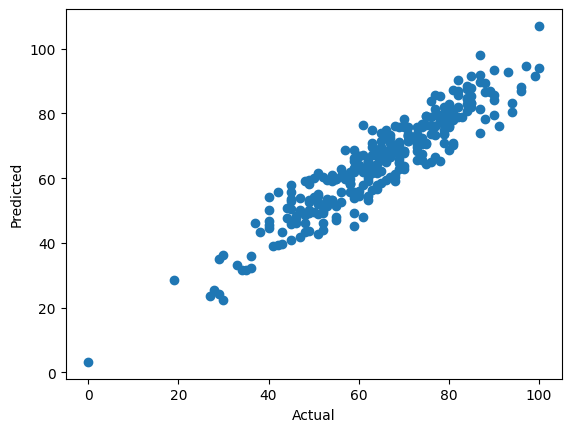

In [58]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')